In [1]:
import os
import numpy as np
import pandas as pd
import datetime
import random
import matplotlib.pyplot as plt

In [2]:
pd.set_option('max_rows', 20)

plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 3)
plt.rcParams['font.family'] = 'sans-serif'

In [3]:
# 指定檔案位置，包含完整路徑以及檔案名稱
# os.curdir: 回傳目前目錄的路徑
# 若無法在個人電腦上以 Anaconda 開啟 Notebook，請用Google Colab開啟，並將下一行程式的註解消除，再將 turbofan.csv 資料上傳 
# Turbofan_FILEPATH = os.path.join(os.curdir, 'turbofan.csv')
Turbofan_FILEPATH = os.path.join(os.curdir, 'data', 'turbofan.csv')
# 檢視檔案位置
print(Turbofan_FILEPATH)
# 讀取 CSV 檔案，並將其指定為名稱是 df (DataFrame) 的物件
df = pd.read_csv(filepath_or_buffer=Turbofan_FILEPATH)
df_bak = df.copy()

./data/turbofan.csv


In [4]:
df.head()

,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388,100.0,39.06,23.4190,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388,100.0,39.00,23.4236,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388,100.0,38.95,23.3442,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388,100.0,38.88,23.3739,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388,100.0,38.90,23.4044,NaN,NaN,NaN,NaN,NaN,NaN


# 第 5 章：計算

## 四則運算

在 Pandas 內做四則運算是相當容易的，只要加上對應的運算子 `+`, `-`, `*`, `/` 就可以了。

In [5]:
# 將 感測器3 減去 感測器4 (column label: 'sensor_3', 'sensor_4') 
# 例：要計算設備的出入口壓力差，或是流量差

df['sensor_3minus4'] = df['sensor_3'] - df['sensor_4']
df['sensor_3minus4']

0        189.10
1        188.68
2        183.79
3        180.92
4        176.63
          ...  
20626    169.35
20627    170.92
20628    174.28
20629    178.73
20630    168.24
Name: sensor_3minus4, Length: 20631, dtype: float64

## Date Type 相關

### `.astype()` :  轉換 Data Type (dtype)

每一筆資料都帶有不同的 Column，記錄著不同的資料，這些資料的型態有可能為文字、數值、時間等等，要幫資料賦予正確資料型態，才有辦法做相對應的處理。

參考文件：

* [pandas.DataFrame.astype](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html#pandas-dataframe-astype)
* [pandas.Series.astype](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html#pandas-series-astype)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   unit_number     20631 non-null  int64  
 1   time_in_cycles  20631 non-null  int64  
 2   op_setting_1    20631 non-null  float64
 3   op_setting_2    20631 non-null  float64
 4   op_setting_3    20631 non-null  float64
 5   sensor_1        20631 non-null  float64
 6   sensor_2        20631 non-null  float64
 7   sensor_3        20631 non-null  float64
 8   sensor_4        20631 non-null  float64
 9   sensor_5        20631 non-null  float64
 10  sensor_6        20631 non-null  float64
 11  sensor_7        20631 non-null  float64
 12  sensor_8        20631 non-null  float64
 13  sensor_9        20631 non-null  float64
 14  sensor_10       20631 non-null  float64
 15  sensor_11       20631 non-null  float64
 16  sensor_12       20631 non-null  float64
 17  sensor_13       20631 non-null 

In [7]:
# 觀察工作週期(column label: 'time_in_cycles') 的資料型態
df.dtypes['time_in_cycles']

dtype('int64')

In [8]:
# 使用 .dtypes 觀察特定 column的型別，如果不是正確的型別，可以使用 .astype() 進行型別轉換
# 因為此資料的型別都是正確的，故這裡只提供程式碼作為示意，則不進行型別轉換

# 轉換成文字型態 (str)
# df['time_in_cycles'] = df['time_in_cycles'].astype(str)

In [9]:
# 轉換成浮點數型態 (float)
# df['time_in_cycles'] = df['time_in_cycles'].astype(float)

### `pandas.to_datetime()`：自動轉換日期資料，並將 Date Type 轉換為 datetime

當資料中有關於與日期相關的 column 時，可以考慮轉換成 `datetime` 的 data type 以利處理。

轉換的情境有兩個：

1. 某個 column 有時間日期的相關資料，如 `2018-01-01`, `2018/01/01`, `20180101`, `20180101 01:00:00`......等
1. 分散在多個 column 的日期相關資料，如 `pd.DataFrame({'year':[2018], 'month':[1], 'day': [1]]})`

Pandas 在處理的時候，會依照部分預設的規則，去猜測時間日期的格式進而轉換，當然也可以手動設定時間日期格式。

* 常用 Parameters：
    1. `format`：時間日期的格式，例如 `%d-%m-%y` 即為「年-月-日」的格式。有關日期格式的指定方法，請參見 Python 官方文件中，有關 [`datetime.strftime()`  和 `datetime.strptime()` function 的說明](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)
    1. `infer_datetime_format`：是否要在沒有指定時間日期格式的情況，自行推論日期格式。
        * `True`：選擇讓 Pandas 推論時間日期格式。如果確定資料格式是可以被推論的，將此 Parameter 設為 True 時，將可以加快處理的速度。
        * `False`：選擇不讓 Pandas 推論時間日期格式。通常設定為 `False` 時，會搭配設定時間日期格式。
* 參考文件：
    * [pandas.to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html#pandas-to-datetime)
    * [Time Series / Date functionality | Converting to Timestamps](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#time-series-date-functionality)

In [10]:
tmp = pd.date_range('2020-12-01 00:00:00', '2020-12-02 00:00:00', freq="S")
tmp = pd.DataFrame(tmp, columns=["time"])
tmp["time"] = tmp["time"].dt.strftime("%Y%m%d%H%M%S")
tmp

,time
0,20201201000000
1,20201201000001
2,20201201000002
3,20201201000003
4,20201201000004
...,...
86396,20201201235956
86397,20201201235957
86398,20201201235958
86399,20201201235959


In [11]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86401 entries, 0 to 86400
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   time    86401 non-null  object
dtypes: object(1)
memory usage: 675.1+ KB


In [12]:
pd.to_datetime(tmp['time'])

0       2020-12-01 00:00:00
1       2020-12-01 00:00:01
2       2020-12-01 00:00:02
3       2020-12-01 00:00:03
4       2020-12-01 00:00:04
                ...        
86396   2020-12-01 23:59:56
86397   2020-12-01 23:59:57
86398   2020-12-01 23:59:58
86399   2020-12-01 23:59:59
86400   2020-12-02 00:00:00
Name: time, Length: 86401, dtype: datetime64[ns]

In [13]:
# %timeit pd.to_datetime(tmp['time'])
## 7.09 s ± 583 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

7.09 s ± 583 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
# %timeit pd.to_datetime(tmp['time'], infer_datetime_format=True)
## 6.96 s ± 193 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

6.96 s ± 193 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## DataFrame 常用運算方法


### `.min()` : 計算最小值

* 常用 Parameters：
    1. `axis`：
        * `1` : 以 column 方向計算
        * `0` : 以 row 方向計算
    1. `skipna`：預設為 `True`
        * `True` : 計算統計量的時候忽略 NA (`np.nan`，`None`)
        * `False` : 只要資料中出現一筆 NA，則回傳 `NaN`
* Return : Series 或 DataFrame
* 參考文件：
    * [pandas.DataFrame.min](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.min.html#pandas-dataframe-min)
    * [pandas.Series.min](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.min.html#pandas-series-min)


In [15]:
# 例：計算各空氣品質監測項目的最小值
df.min()

unit_number         1.0000
time_in_cycles      1.0000
op_setting_1       -0.0087
op_setting_2       -0.0006
op_setting_3      100.0000
                    ...   
sensor_24              NaN
sensor_25              NaN
sensor_26              NaN
sensor_27              NaN
sensor_3minus4    155.5500
Length: 33, dtype: float64

### `.max()`：計算最大值

* 常用 Parameters：
    1. `axis`：
        * `1` : 以 column 方向計算
        * `0` : 以 row 方向計算
    1. `skipna`：預設為 `True`
        * `True` : 計算統計量的時候忽略 NA (`np.nan`，`None`)
        * `False` : 只要資料中出現一筆 NA，則回傳 `NaN`
* Return : Series 或 DataFrame
* 參考文件
    * [pandas.DataFrame.max](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.max.html#pandas-dataframe-max)
    * [pandas.Series.max](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.max.html#pandas-series-max)

    


In [16]:
# 例：計算各空氣品質監測項目的最大值
df.max()

unit_number       100.0000
time_in_cycles    362.0000
op_setting_1        0.0087
op_setting_2        0.0006
op_setting_3      100.0000
                    ...   
sensor_24              NaN
sensor_25              NaN
sensor_26              NaN
sensor_27              NaN
sensor_3minus4    206.0100
Length: 33, dtype: float64

### `.mean()`：計算平均值

* 常用 Parameters：
    1. `axis`：
        * `1` : 以 column 方向計算
        * `0` : 以 row 方向計算
    1. `skipna`：預設為 `True`
        * `True` : 計算統計量的時候忽略 NA (`np.nan`，`None`)
        * `False` : 只要資料中出現一筆 NA，則回傳 `NaN`
* Return : Series 或 DataFrame
* 參考文件
    * [pandas.DataFrame.mean](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html#pandas-dataframe-mean)
    * [pandas.Series.mean](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.mean.html#pandas-series-mean)



In [17]:
# 例：計算各空氣品質監測項目的平均值
df.mean()

unit_number        51.506568
time_in_cycles    108.807862
op_setting_1       -0.000009
op_setting_2        0.000002
op_setting_3      100.000000
                     ...    
sensor_24                NaN
sensor_25                NaN
sensor_26                NaN
sensor_27                NaN
sensor_3minus4    181.589337
Length: 33, dtype: float64

### `.std()`：計算標準差

* 常用 Parameters：
    1. `axis`：
        * `1` : 以 column 方向計算
        * `0` : 以 row 方向計算
    1. `skipna`：預設為 `True`
        * `True` : 計算統計量的時候忽略 NA (`np.nan`，`None`)
        * `False` : 只要資料中出現一筆 NA，則回傳 `NaN`
* Return : Series 或 DataFrame
* 參考文件：
    * [pandas.DataFrame.std](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html#pandas-dataframe-std)
    * [pandas.Series.std](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.std.html#pandas-series-std)

In [18]:
# 例：計算各空氣品質監測項目的標準差
df.std()

unit_number       29.227633
time_in_cycles    68.880990
op_setting_1       0.002187
op_setting_2       0.000293
op_setting_3       0.000000
                    ...    
sensor_24               NaN
sensor_25               NaN
sensor_26               NaN
sensor_27               NaN
sensor_3minus4     6.612621
Length: 33, dtype: float64

### `.median()`：計算中位數

* 常用 Parameters：
    1. `axis`：
        * `1` : 以 column 方向計算
        * `0` : 以 row 方向計算
    1. `skipna`：預設為 `True`
        * `True` : 計算統計量的時候忽略 NA (`np.nan`，`None`)
        * `False` : 只要資料中出現一筆 NA，則回傳 `NaN`
* Return : Series 或 DataFrame
* 參考文件：
    * [pandas.DataFrame.median](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.median.html#pandas-dataframe-median)
    * [pandas.Series.median](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.median.html#pandas-series-median)




In [19]:
# 例：計算各空氣品質監測項目的中位數
df.median()

/Users/liyating/.local/share/virtualenvs/pandas_training_env-txbSq38o/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


unit_number        52.00
time_in_cycles    104.00
op_setting_1        0.00
op_setting_2        0.00
op_setting_3      100.00
                   ...  
sensor_24            NaN
sensor_25            NaN
sensor_26            NaN
sensor_27            NaN
sensor_3minus4    181.62
Length: 33, dtype: float64

### .quantile()：計算分位數

* 常用 Parameters : 
    1. `q` : 分位數，預設為 0.5。可以輸入
        * 浮點數 `float` (例如 `0.25`, `0.5`, `0.75`)：計算一個分位數
        * `array-like` （可迭代）的物件 (例如 \[0.25, 0.5\])：計算多個分位數
    1. `axis`：
        * `1` : 以 column 方向計算
        * `0` : 以 row 方向計算
    1. `numeric_only`：是否僅允許輸入數值型資料，預設為 `True`
        * `True`：只計算數值型資料
        * `False`：不只數值型資料，若資料中包含 `datetime` 和 `timedelta` 也會計算
    1. `interpolation` : 插補法，預設為 `linear`（線性）
* 參考文件：
    * [pandas.DataFrame.quantile](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html#pandas-dataframe-quantile)
    * [pandas.Series.quantile](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.quantile.html#pandas-series-quantile)

> 備註：
>
> 計算分位數時，如果資料中有包含 NA，則會自動忽略此筆資料。
> 
> 例如有 10 筆資料，其中一筆為 NA，則計算時只會拿 9 筆資料來計算分位數。

In [20]:
# 例：計算各空氣品質監測項目的「第一四分位數」和「第三四分位數」
df.quantile(q=[0.25, 0.75])

,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_3minus4
0.25,26.0,52.0,-0.0015,-0.0002,100.0,518.67,642.325,1586.26,1402.360,14.62,...,100.0,38.70,23.2218,NaN,NaN,NaN,NaN,NaN,NaN,177.16
0.75,77.0,156.0,0.0015,0.0003,100.0,518.67,643.000,1594.38,1414.555,14.62,...,100.0,38.95,23.3668,NaN,NaN,NaN,NaN,NaN,NaN,186.15


#### 名詞釋疑

與 Quantile 相關的數值有三個：

1. `Quantile`: 分位數
1. `Quartile`: 四分位數
1. `Percentile`: 百分位數

其中的對應關係如下：

* `0` quartile = `0` quantile = `0` percentile
* `1` quartile = `0.25` quantile = `25` percentile = 第一四分位數 = 下四分位數
* `2` quartile = `.5` quantile = `50` percentile = median = 第二四分位數 = 中位數
* `3` quartile = `.75` quantile = `75` percentile = 第三四分位數 = 上四分位數
* `4` quartile = `1` quantile = `100` percentile

參考資料：[Percentile vs quantile vs quartile | StackExchange](https://stats.stackexchange.com/a/156787)

### `.mode()` : 計算眾數 

* 常用 Parameters：
    1. `axis`：
        * `1` : 以 column 方向計算
        * `0` : 以 row 方向計算
    1. `skipna`：預設為 `True`
        * `True` : 計算統計量的時候忽略 NA (`np.nan`，`None`)
        * `False` : 只要資料中出現一筆 NA，則回傳 `NaN`
* Return : Series 或 DataFrame
* 參考文件：
    * [pandas.DataFrame.mode](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mode.html#pandas-dataframe-mode)
    * [pandas.Series.mode](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.mode.html#pandas-series-mode)




In [21]:
# 例：計算各空氣品質監測項目的眾數
df.mode()

,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_3minus4
0,69.0,1,0.0,-0.0003,100.0,518.67,642.5,1590.1,1409.01,14.62,...,100.0,38.86,23.3222,NaN,NaN,NaN,NaN,NaN,NaN,183.45
1,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,NaN,124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,NaN,125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,NaN,127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### `.sum()`：計算總和

* 常用 Parameters：
    1. `min_count` : 設定非遺漏值的最小數量，預設為 `0`
        * `0` : 若 Series 中全部是 `NaN` 或是空值，則回傳 `0.0`
        * 其他數值 : 若 Series 中非 `NaN` 的數值筆數小於 `min_count` 所設定的數量 ，則回傳 `NaN`
    1. `axis`：
        * `1` : 以 column 方向計算
        * `0` : 以 row 方向計算
    1. `skipna`：預設為 `True`
        * `True` : 計算統計量的時候忽略 NA (`np.nan`，`None`)
        * `False` : 只要資料中出現一筆 NA，則回傳 `NaN`
* Return : Series 或 DataFrame
* 參考文件：
    * [pandas.DataFrame.sum](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html#pandas-dataframe-sum)
    * [pandas.Series.sum](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sum.html#pandas-series-sum)

In [22]:
tmp = pd.DataFrame({"time":pd.date_range('2020-01', '2021-01', freq="M"), 
                    "RAINFALL":[random.randint(50, 300) for x in range(0, 12)]})
tmp

,time,RAINFALL
0,2020-01-31,61
1,2020-02-29,300
2,2020-03-31,141
3,2020-04-30,232
4,2020-05-31,107
5,2020-06-30,196
6,2020-07-31,100
7,2020-08-31,272
8,2020-09-30,160
9,2020-10-31,236


In [23]:
tmp["RAINFALL"].sum()

2379

> 備註：以下補充針對 Parameter `min_count` 的一些測試：

In [24]:
# 狀況1. Series 為空的，min_count=0
# output 為 0.0: 因為 min_count=0，Series 是空的，則回傳 0.0
pd.Series([]).sum(skipna=True, min_count=0)

/Users/liyating/.local/share/virtualenvs/pandas_training_env-txbSq38o/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


0.0

In [25]:
# 狀況2. Series 為空的，min_count=1
# 因為 min_count=1，Series 被判定為空的，非 NaN 的數值筆數小於 min_count，則回傳 nan
pd.Series([]).sum(skipna=True, min_count=1)

/Users/liyating/.local/share/virtualenvs/pandas_training_env-txbSq38o/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


nan

In [26]:
# 狀況3. Series 為 np.nan，min_count=0
# 因為 skipna=True 則 Series 被判定為空的，又因為 min_count 被設定為 0，因此回傳 0.0
pd.Series([np.nan]).sum(skipna=True, min_count=0)

0.0

In [27]:
# 如果 skipna=False，因為只要資料中出現一筆 NA，則回傳 NaN。
# 即使 min_count=0 時，因為 Series 中也全都是 NaN，依然回傳 0.0
pd.Series([np.nan]).sum(skipna=False, min_count=0)

nan

In [28]:
# 狀況4. Series 為 np.nan，min_count=1
pd.Series([np.nan]).sum(skipna=True, min_count=1)

nan

### `.round()`：將浮點數(dtype=float64)取到某位數並四捨五入



* 參考文件：
    * [pandas.DataFrame.round](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.round.html#pandas-dataframe-round)
    * [pandas.Series.round](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.round.html#pandas-series-round)

In [26]:
# 觀察原始 感測器21 (column label: 'sensor_21') 資料
df.loc[:, 'sensor_21'].head(10)

0    23.4190
1    23.4236
2    23.3442
3    23.3739
4    23.4044
5    23.3669
6    23.3774
7    23.3106
8    23.4066
9    23.4694
Name: sensor_21, dtype: float64

In [27]:
# 例：將 感測器21 (column label: 'sensor_21') 取到小數點底下第二位
df.loc[:, 'sensor_21'].round(2).head(10)

0    23.42
1    23.42
2    23.34
3    23.37
4    23.40
5    23.37
6    23.38
7    23.31
8    23.41
9    23.47
Name: sensor_21, dtype: float64

### `.corr()`：計算 column 之間的線性關係的強度和方向

調用 `.corr()` method 時，Pandas 會自動排除 NA，不列入計算。



* 常用 Parameters：
    1. `method` 選擇要計算的相關係數，預設為 `pearson`
        * `pearson` : 即為 **Pearson standard correlation coefficient**，用來衡量兩個等距尺度或等比尺度變數之相關性。
        * 參考文件：
            * [Wikipedia | 相關](https://zh.wikipedia.org/zh-tw/相關)
    1. `min_periods`：設定資料的 row 的最小數量，預設為`1`
        * rows 的數量必須大於等於此值，否則回傳 `NaN`
* 參考文件：
    * [pandas.DataFrame.corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html#pandas-dataframe-corr)
    * [pandas.Series.corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.corr.html#pandas-series-corr)

In [31]:
metadata = ['unit_number', 'time_in_cycles']
col_part = metadata + ['sensor_{}'.format(i) for i in [2, 3, 4, 7, 8, 9, 11, 12, 13, 14, 15, 17, 20 ,21]] 
df_2 = df.loc[:, col_part]
df_2["RUL"] = 0

def create_rul(df):
    for i in df["unit_number"].unique():
        rul = [max(df[df["unit_number"]==i]["time_in_cycles"])] * df[df["unit_number"]==i]["time_in_cycles"].shape[0]
        df.loc[df["unit_number"]==i, "RUL"] = rul - df[df["unit_number"]==i]["time_in_cycles"]
    return df

df_2 = create_rul(df_2)
df_2

,unit_number,time_in_cycles,sensor_2,sensor_3,sensor_4,sensor_7,sensor_8,sensor_9,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21,RUL
0,1,1,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,4
20627,100,197,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,3
20628,100,198,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2
20629,100,199,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,1


In [32]:
# 若無法在個人電腦上以 Anaconda 開啟 Notebook，請用Google Colab開啟，並將下一行程式的註解消除，再將 df_2 儲存 # 
# df_2.to_csv(os.path.join(os.getcwd(), "turbofan_rul.csv"), index=False)
df_2.to_csv(os.path.join(os.getcwd(), "data", "turbofan_rul.csv"), index=False)

In [34]:
# 利用 .corr() 計算 column 之間的相關係數
df_2.corr()

,unit_number,time_in_cycles,sensor_2,sensor_3,sensor_4,sensor_7,sensor_8,sensor_9,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21,RUL
unit_number,1.000000,0.078753,0.014133,0.012621,0.026116,-0.032073,0.039929,-0.052053,0.024707,-0.031882,0.044230,-0.059473,0.022486,0.013513,-0.020589,-0.016465,0.078753
time_in_cycles,0.078753,1.000000,0.549898,0.543947,0.624577,-0.595914,0.475977,0.443999,0.634385,-0.611354,0.477523,0.370324,0.588676,0.566995,-0.583597,-0.585923,-0.736241
sensor_2,0.014133,0.549898,1.000000,0.602610,0.714949,-0.702136,0.662325,0.273764,0.740020,-0.724578,0.661792,0.179752,0.675975,0.629886,-0.661841,-0.668050,-0.606484
sensor_3,0.012621,0.543947,0.602610,1.000000,0.678413,-0.664595,0.602481,0.322964,0.695900,-0.680307,0.600963,0.237137,0.639921,0.600017,-0.625941,-0.633901,-0.584520
sensor_4,0.026116,0.624577,0.714949,0.678413,1.000000,-0.793130,0.746852,0.297429,0.830136,-0.815591,0.745158,0.190748,0.758459,0.703499,-0.748067,-0.745193,-0.678948
sensor_7,-0.032073,-0.595914,-0.702136,-0.664595,-0.793130,1.000000,-0.767132,-0.217835,-0.822805,0.812713,-0.764611,-0.110053,-0.747051,-0.692893,0.736163,0.737447,0.657223
sensor_8,0.039929,0.475977,0.662325,0.602481,0.746852,-0.767132,1.000000,-0.032091,0.782213,-0.786540,0.826084,-0.144787,0.700949,0.627785,-0.687030,-0.688840,-0.563968
sensor_9,-0.052053,0.443999,0.273764,0.322964,0.297429,-0.217835,-0.032091,1.000000,0.274591,-0.210238,-0.034763,0.963157,0.293753,0.337110,-0.285280,-0.292795,-0.390102
sensor_11,0.024707,0.634385,0.740020,0.695900,0.830136,-0.822805,0.782213,0.274591,1.000000,-0.846884,0.780761,0.163408,0.780913,0.722296,-0.771510,-0.772554,-0.696228
sensor_12,-0.031882,-0.611354,-0.724578,-0.680307,-0.815591,0.812713,-0.786540,-0.210238,-0.846884,1.000000,-0.788441,-0.098141,-0.766052,-0.703485,0.751943,0.756263,0.671983


通常會搭配圖表一起觀察，一般是畫[散佈圖 (Scatter plot)](https://en.wikipedia.org/wiki/Scatter_plot) 或是 [Heatmap](https://en.wikipedia.org/wiki/Heat_map)。

* 兩個 column 之間的散佈圖：[pandas.DataFrame.plot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html#pandas.DataFrame.plot)
    * `pandas.DataFrame.plot(x='column-1', y='column-2', kind= 'scatter')`
* 多個 column 之間的散佈圖：[pandas.plotting.scatter_matrix](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html#pandas-plotting-scatter-matrix)
    * `pandas.plotting.scatter_matrix(dataframe, figsize=(3,3))`
*  matplotlib.pyplot.imshow 繪製 heatmap : [Correlation in Python](http://benalexkeen.com/correlation-in-python/)


<AxesSubplot:xlabel='RUL', ylabel='sensor_11'>

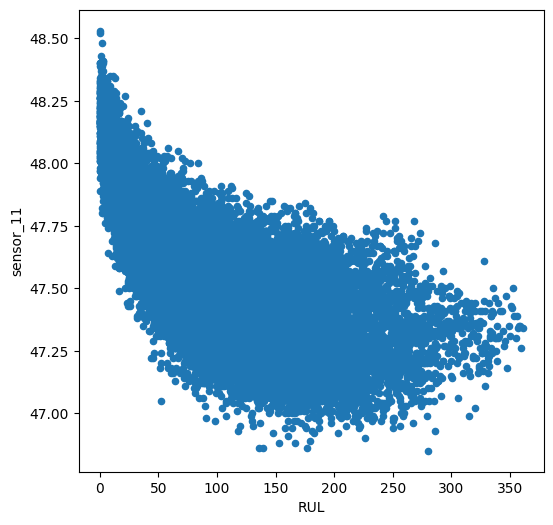

In [45]:
# 使用 .plot(kind='scatter') 畫出
# 感測器11 (column label: 'sensor_11') 和 剩餘壽命 (column label: 'RUL') 的散佈圖
df_2.plot(x='RUL', y='sensor_11', kind='scatter', figsize=(6,6)) 

<AxesSubplot:>

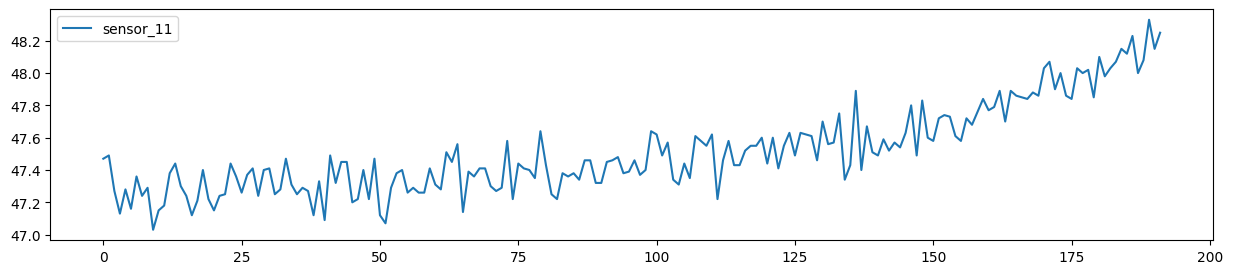

In [44]:
# 使用 .plot(kind='line') 畫出
# 感測器11 (column label: 'sensor_11') 和 剩餘壽命 (column label: 'RUL') 的散佈圖
df_2.loc[df_2["unit_number"]==1, ["sensor_11"]].plot(figsize=(15,3)) 

array([[<AxesSubplot:xlabel='sensor_15', ylabel='sensor_15'>,
        <AxesSubplot:xlabel='sensor_17', ylabel='sensor_15'>,
        <AxesSubplot:xlabel='sensor_20', ylabel='sensor_15'>,
        <AxesSubplot:xlabel='sensor_21', ylabel='sensor_15'>,
        <AxesSubplot:xlabel='RUL', ylabel='sensor_15'>],
       [<AxesSubplot:xlabel='sensor_15', ylabel='sensor_17'>,
        <AxesSubplot:xlabel='sensor_17', ylabel='sensor_17'>,
        <AxesSubplot:xlabel='sensor_20', ylabel='sensor_17'>,
        <AxesSubplot:xlabel='sensor_21', ylabel='sensor_17'>,
        <AxesSubplot:xlabel='RUL', ylabel='sensor_17'>],
       [<AxesSubplot:xlabel='sensor_15', ylabel='sensor_20'>,
        <AxesSubplot:xlabel='sensor_17', ylabel='sensor_20'>,
        <AxesSubplot:xlabel='sensor_20', ylabel='sensor_20'>,
        <AxesSubplot:xlabel='sensor_21', ylabel='sensor_20'>,
        <AxesSubplot:xlabel='RUL', ylabel='sensor_20'>],
       [<AxesSubplot:xlabel='sensor_15', ylabel='sensor_21'>,
        <AxesSubplot:xl

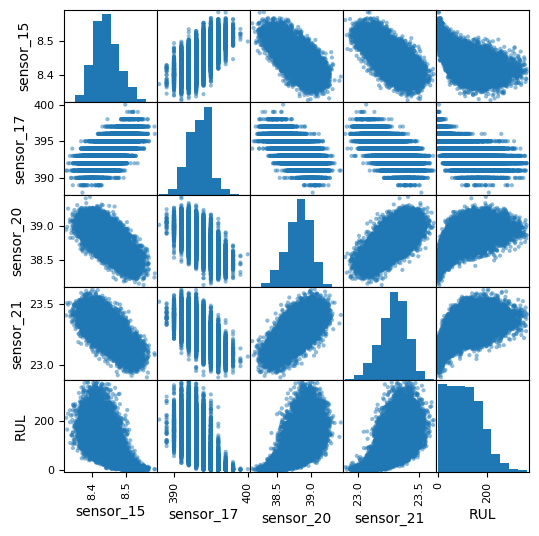

In [37]:
# 使用 pandas.plotting.scatter_matrix() 一次畫出
# 前 5 個 columns 彼此之間相關性的 scatter plots
pd.plotting.scatter_matrix(df_2.iloc[:, -5:], figsize=(6, 6))

> 備註：
> 
> 說到畫圖，[Seaborn](https://seaborn.pydata.org) 也是另一個好用的套件，易學、美觀、好操作，後面的課程會進行教學，故在此不詳加說明。
>
> 附上參考連結：[用法](https://seaborn.pydata.org/tutorial.html)以及[可製作的圖表類型](https://seaborn.pydata.org/examples/index.html)。

<AxesSubplot:>

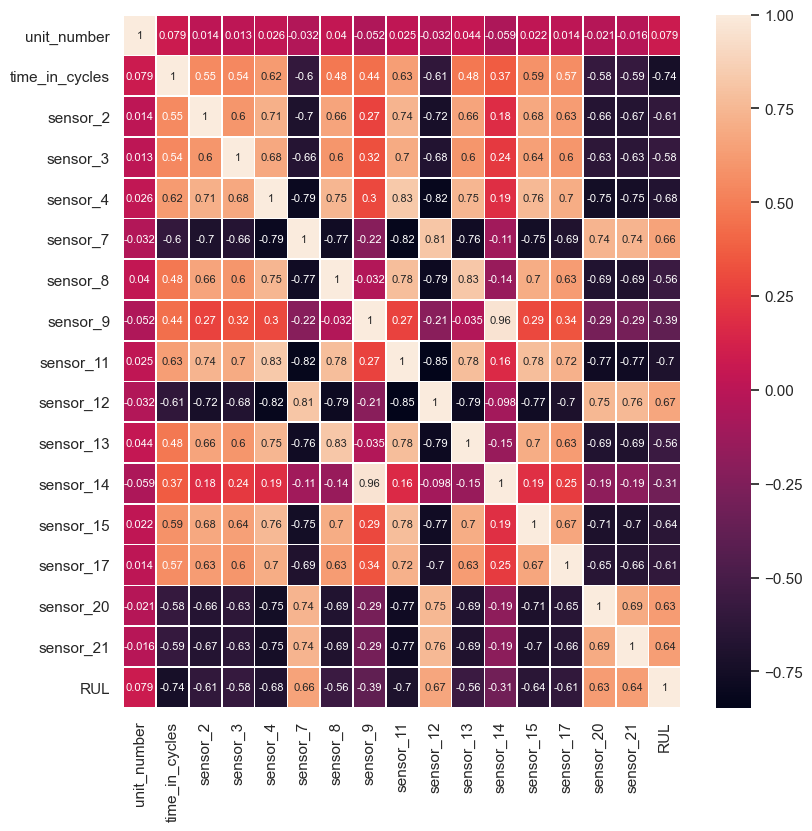

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(df_2.corr(), annot=True, annot_kws={'fontsize': 8}, linewidths=.5, ax=ax)

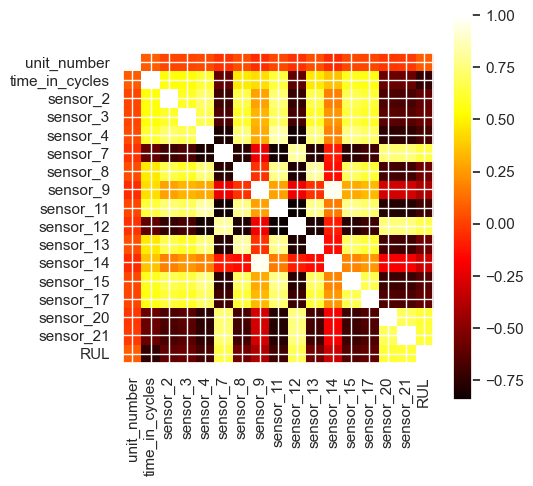

In [39]:
plt.figure(figsize=(5,5))
plt.imshow(df_2.corr(), cmap='hot', interpolation='nearest')
plt.xticks(range(len(df_2.columns)), df_2.columns, rotation=90) # rotation (文字)旋轉角度
plt.yticks(range(len(df_2.columns)), df_2.columns)
plt.colorbar()
plt.show()

### `.idxmin()`, `idxmax()`：回傳最小值或最大值的 Index Label

* 常用 Parameters：
    1. `axis`：
        * `1` : 以 column 方向計算
        * `0` : 以 row 方向計算
    1. `skipna`：預設為 `True`
        * `True` : 計算統計量的時候忽略 NA (`np.nan`，`None`)
        * `False` : 只要資料中出現一筆 NA，則回傳 `NaN`
* Return：Series
* 參考文件：
    * [pandas.DataFrame.idxmin](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmin.html#pandas-dataframe-idxmin)
    * [pandas.DataFrame.idxmax](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmax.html#pandas-dataframe-idxmax)
    * [pandas.Series.idxmin](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.idxmin.html#pandas-series-idxmin)
    * [pandas.Series.idxmax](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.idxmax.html#pandas-series-idxmax)



In [41]:
# 找出 感測器2 (column label: 'sensor_2') 最小值的 index label
df.loc[:, 'sensor_2'].idxmin()

11979

In [42]:
# 之後就可以拿來找尋當時的資料狀況
sensor_2_min = df.loc[:, 'sensor_2'].idxmin()
df.loc[sensor_2_min, :]

unit_number        61.0000
time_in_cycles     38.0000
op_setting_1        0.0048
op_setting_2       -0.0004
op_setting_3      100.0000
                    ...   
sensor_24              NaN
sensor_25              NaN
sensor_26              NaN
sensor_27              NaN
sensor_3minus4    194.3000
Name: 11979, Length: 33, dtype: float64